# Train two layer classifier on a spiral data set

In [1]:
import sys
import os 

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import inspect
from functools import partial
import logging
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#!conda install line_profile memory_profiler
%load_ext memory_profiler
%load_ext line_profiler

# Logging is enabled by calling logging.basicConfig
# logging.basicConfig(stream=sys.stdout, level=logging.ERROR)
# Logger = logging.getLogger("neural_network")

In [4]:
import matplotlib.style as mplstyle
mplstyle.use('fast')
plt.ion()

# Note: with notebook backend from the top, updating the plot line does not work...
%matplotlib notebook
# %matplotlib inline

In [10]:
from data import (
    spiral
)
from drawing import (
    COLOR_LABELS,
    plot_categorical_predictions
)
from common import (
    transform_X_T,
    weights,
    softmax_cross_entropy_log_loss,
    prediction_grid_2d
)
from optimizer import (
    SGD
)
from network import (
    train_two_layer_classifier
)

In [6]:
M = 3        # Number of category classes
K = 100       # Number of data points per class
N = M * K    # Number of entire data points
D = 3        # Dimensions inluding bias


# X[::,0] is bias
X, T = spiral(K, D, M)

# Y is colors as labels, instead of category indices.
Y = COLOR_LABELS[T]

fig, ax = plt.subplots(figsize=(6,5)) 
ax.scatter(X[:, 1], X[:, 2], c=Y, s=40)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.grid()

plt.show()

<IPython.core.display.Javascript object>

## Train on non-linear separable spiral data

In [7]:
MAX_TEST_TIMES = 1000

M1 = 100
W1 = weights.he(M1, D)
M2: int = 3                 # Number of categories to classify
W2 = weights.he(M2, M1)
optimizer = SGD(lr=0.15)

X, T = transform_X_T(X, T)
W1, W2, objective, prediction = train_two_layer_classifier(
    N=N,
    D=D,
    X=X,
    T=T,
    M1=M1,
    W1=W1,
    M2=M2,
    W2=W2,
    log_loss_function=softmax_cross_entropy_log_loss,
    optimizer=optimizer,
    num_epochs=MAX_TEST_TIMES,
    test_numerical_gradient=False
)


Expected dL/dW 
[[-3.29514566e-02  2.09002594e-02  1.63921838e-02 -5.97276330e-03  1.91635985e-03  2.08302351e-02  0.00000000e+00  1.07331000e-03  8.61632567e-02  6.41258631e-02  0.00000000e+00 -3.52469448e-02  3.88565389e-03 -6.99960256e-02  2.15981694e-02  1.19462375e-02 -2.15395817e-02 -4.16539766e-02  1.61811888e-02  1.53476278e-02  0.00000000e+00 -2.12687012e-02  0.00000000e+00  1.38248765e-02  1.44600481e-02  0.00000000e+00  2.18256579e-03  7.62108358e-04  3.64596639e-02  0.00000000e+00 -5.04682050e-02 -2.61940299e-02 -1.48924040e-02  4.99749255e-03  6.05059699e-02  0.00000000e+00 -8.64125941e-03 -8.60136536e-03 -8.22856217e-03 -2.64054235e-02  4.64949402e-04 -2.89606977e-02  3.94532846e-03  8.42998065e-04 -7.83739034e-03 -5.79470532e-03  6.44350712e-03  9.62377375e-02  1.01478261e-02  6.57312131e-03  2.66281959e-03  5.82235454e-02  5.78585811e-03 -2.06920907e-02  1.26807204e-02  6.17334254e-03 -1.29048075e-02  4.99668510e-02  1.20428232e-02  5.10348945e-02  1.83083381e-04  7.426

iteration 0 Loss 1.1240285064230549
iteration 100 Loss 0.865589062091344
iteration 200 Loss 0.813604564084438
iteration 300 Loss 0.7657704257512759
iteration 400 Loss 0.724453588083946
iteration 500 Loss 0.6892617399672492
iteration 600 Loss 0.659901224750484
iteration 700 Loss 0.6359864872763332
iteration 800 Loss 0.616422005355287
iteration 900 Loss 0.5996859162069753


## Plot the prediction with the trained model

In [8]:
x_min, x_max = X[:, 1].min(), X[:, 1].max()
y_min, y_max = X[:, 2].min(), X[:, 2].max()

<IPython.core.display.Javascript object>


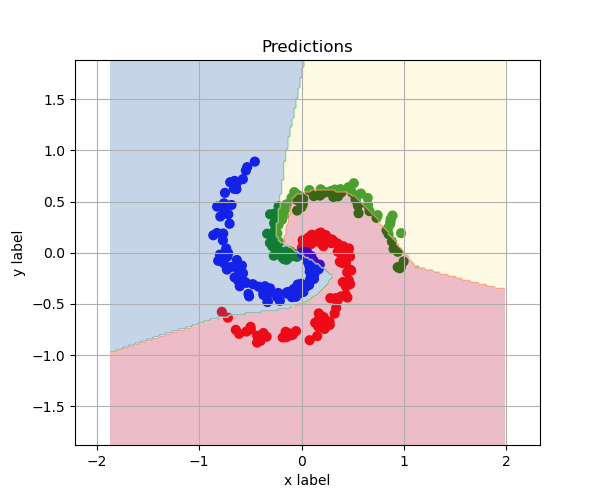

In [11]:
fig, ax = plt.subplots(figsize=(6,5)) 
for i in range(2):
    ax.set_xlabel('x label')
    ax.set_ylabel('y label')
    ax.axis('equal')
    ax.grid()

ax.set_title("Predictions")
#ax.set_xlim(-1, 1)
#ax.set_ylim(-1, 1)

x_grid, y_grid, predictions = prediction_grid_2d(x_min, x_max, y_min, y_max, prediction)
plot_categorical_predictions(ax, [x_grid, y_grid], X, Y, predictions)